In [28]:
import os
import numpy as np
import cv2
from tensorflow.keras.utils import to_categorical
from sklearn.model_selection import train_test_split
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
import matplotlib.pyplot as plt

In [29]:
# directory of the dataset
dataset_dir = 'C:/Users/user/Desktop/BICS Coursework/IS Project II/dataset/leapGestRecog/00/'

In [30]:
# Load the dataset
def load_dataset(dataset_dir, img_size=(64, 64)):
    images = []
    labels = []
#     gesture_labels = {'palm': 0, 'l': 1, 'fist': 2, 'fist_moved': 3, 'thumb': 4, 'index': 5, 'ok': 6, 'palm_moved': 7, 'c': 8, 'down': 9}
    gesture_labels = {'01_palm': 0, '02_l': 1, '03_fist': 2, '04_fist_moved': 3, '05_thumb': 4, '06_index': 5, '07_ok': 6, '08_palm_moved': 7, '09_c': 8, '10_down': 9}
    
    for label, gesture in gesture_labels.items():
        gesture_dir = os.path.join(dataset_dir, label)
        for img_file in os.listdir(gesture_dir):
            img_path = os.path.join(gesture_dir, img_file)
            img = cv2.imread(img_path)
            if img is not None:
                img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
                img = cv2.resize(img, img_size)
                images.append(img)
                labels.append(gesture)
    
    images = np.array(images, dtype='float32') / 255.0
    labels = np.array(labels)
    return images, labels


In [31]:
img_size = (64, 64)
X, y = load_dataset(dataset_dir, img_size)

In [32]:
# Convert labels to one-hot encoding
y = to_categorical(y, num_classes=10)

In [33]:
# Split the dataset into training, validation, and test sets
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.3, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)


In [34]:
# Build and compile the model
def build_model(input_shape):
    model = Sequential()
    model.add(Conv2D(32, (3, 3), activation='relu', input_shape=input_shape))
    model.add(MaxPooling2D((2, 2)))
    model.add(Conv2D(64, (3, 3), activation='relu'))
    model.add(MaxPooling2D((2, 2)))
    model.add(Conv2D(128, (3, 3), activation='relu'))
    model.add(MaxPooling2D((2, 2)))
    model.add(Flatten())
    model.add(Dense(128, activation='relu'))
    model.add(Dropout(0.5))
    model.add(Dense(10, activation='softmax'))
    return model

In [35]:
input_shape = (img_size[0], img_size[1], 3)
model = build_model(input_shape)
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

C:\Users\user\anaconda3\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [36]:
# Data augmentation
datagen = ImageDataGenerator(
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    horizontal_flip=True
)

datagen.fit(X_train)

In [37]:
# Train the model
history = model.fit(datagen.flow(X_train, y_train, batch_size=32),
                    epochs=50,
                    validation_data=(X_val, y_val))

Epoch 1/50


C:\Users\user\anaconda3\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


44/44 ━━━━━━━━━━━━━━━━━━━━ 17s 217ms/step - accuracy: 0.1245 - loss: 2.3012 - val_accuracy: 0.4167 - val_loss: 2.2160
Epoch 2/50
44/44 ━━━━━━━━━━━━━━━━━━━━ 8s 172ms/step - accuracy: 0.2103 - loss: 2.1751 - val_accuracy: 0.4800 - val_loss: 1.4884
Epoch 3/50
44/44 ━━━━━━━━━━━━━━━━━━━━ 9s 195ms/step - accuracy: 0.4106 - loss: 1.5993 - val_accuracy: 0.7467 - val_loss: 0.6731
Epoch 4/50
44/44 ━━━━━━━━━━━━━━━━━━━━ 8s 176ms/step - accuracy: 0.6255 - loss: 1.0274 - val_accuracy: 0.9033 - val_loss: 0.3345
Epoch 5/50
44/44 ━━━━━━━━━━━━━━━━━━━━ 9s 185ms/step - accuracy: 0.7768 - loss: 0.6986 - val_accuracy: 0.7900 - val_loss: 0.4553
Epoch 6/50
44/44 ━━━━━━━━━━━━━━━━━━━━ 10s 213ms/step - accuracy: 0.8026 - loss: 0.5124 - val_accuracy: 0.9233 - val_loss: 0.1366
Epoch 7/50
44/44 ━━━━━━━━━━━━━━━━━━━━ 8s 164ms/step - accuracy: 0.8547 - loss: 0.3895 - val_accuracy: 0.9500 - val_loss: 0.1437
Epoch 8/50
44/44 ━━━━━━━━━━━━━━━━━━━━ 8s 177ms/step - accuracy: 0.8902 - loss: 0.3581 - val_accuracy: 0.9533 - va

In [38]:
# Evaluate the model
test_loss, test_accuracy = model.evaluate(X_test, y_test)
print(f'Test accuracy: {test_accuracy}')

10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step - accuracy: 0.9978 - loss: 0.0048
Test accuracy: 0.996666669845581


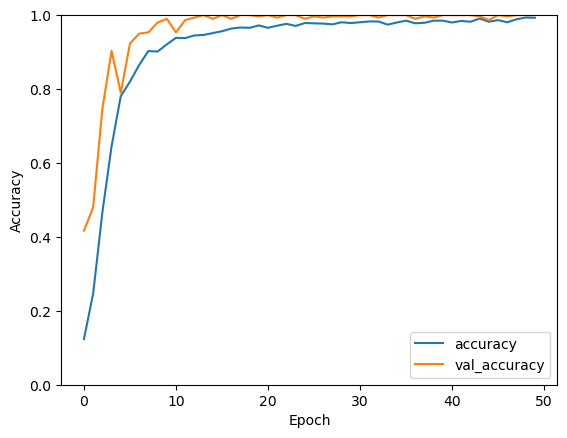

In [39]:
# Plot training history
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label='val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0, 1])
plt.legend(loc='lower right')
plt.show()

In [40]:
model.save('hand_gesture_model.h5')

In [42]:
import keras
keras.saving.save_model(model,'ishara.keras')